In [ ]:
# Data Collection
# Read the data 
import pandas as pd
data = pd.read_csv("http://hackveda.in/sistec/Housing_Modified.csv")
data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


In [ ]:
# Correlation among independent variables and dependent variables
# Correlation - Measure to identify realationship between independent and dependent variables
data.corr() 

,price,lotsize,bedrooms,bathrms,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.178178
garagepl,0.383302,0.352872,0.139117,0.178178,1.000000


In [ ]:
# Preprocessing in Python
# Use a library known as sklearn.preprocessing
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
data.driveway = lb.fit_transform(data.driveway)
data.recroom = lb.fit_transform(data.recroom)
data.fullbase = lb.fit_transform(data.fullbase)
data.gashw = lb.fit_transform(data.gashw)
data.airco = lb.fit_transform(data.airco)
data.prefarea = lb.fit_transform(data.prefarea)

In [ ]:
# Converting N-categorical text values into numbers
lbe = pp.LabelEncoder()
data.stories = lbe.fit_transform(data.stories)

In [ ]:
data.corr()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000000,0.535796,0.366447,0.516719,-0.060219,0.297167,0.254960,0.186218,0.092837,0.453347,0.383302,0.329074
lotsize,0.535796,1.000000,0.151851,0.193833,-0.187664,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bedrooms,0.366447,0.151851,1.000000,0.373769,0.339580,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.516719,0.193833,0.373769,1.000000,0.014685,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
stories,-0.060219,-0.187664,0.339580,0.014685,1.000000,-0.054394,-0.019728,0.100340,0.084305,-0.116403,-0.089589,-0.017673
driveway,0.297167,0.288778,-0.011996,0.041955,-0.054394,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.254960,0.140327,0.080492,0.126892,-0.019728,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
fullbase,0.186218,0.047487,0.097201,0.102791,0.100340,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,0.092837,-0.009201,0.046028,0.067365,0.084305,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
airco,0.453347,0.221765,0.160412,0.184955,-0.116403,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626


In [ ]:
data.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,3,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0


In [ ]:
min_price = data["price"].min()
max_price = data["price"].max()
print("Min value of price is USD %d and max value of price is USD %d" % (min_price, max_price))

# Show the range of lotsize
min_lotsize = data["lotsize"].min()
max_lotsize = data.lotsize.max()
print("Min value of lotsize is %d sq mtr and max value of lotsize is %d sq mtr" % (min_lotsize, max_lotsize))

# Show the range of bedrooms
min_bedrooms = data.bedrooms.min()
max_bedrooms = data.bedrooms.max()
print("Min value of bedrooms is %d and max value is %d" % (min_bedrooms, max_bedrooms))

Min value of price is USD 25000 and max value of price is USD 190000
Min value of lotsize is 1650 sq mtr and max value of lotsize is 16200 sq mtr
Min value of bedrooms is 1 and max value is 6


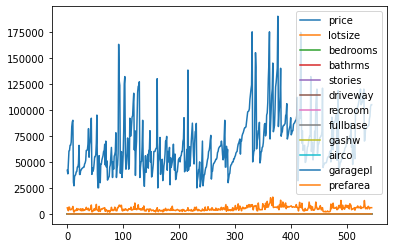

In [ ]:
# Draw a graph of all the values in the current dataframe 
import matplotlib.pyplot as plt
data.plot()

In [ ]:
# To solve the problem of different scale of independent variables.
# We need to use Transformation Techniques to prepare the data for analysis
# MinMax Scaling 

Xnorm = (data.price - min_price)/(max_price - min_price)
Xnorm

0      0.103030
1      0.081818
2      0.148485
3      0.215152
4      0.218182
         ...   
541    0.403030
542    0.418182
543    0.472727
544    0.484848
545    0.484848
Name: price, Length: 546, dtype: float64

In [ ]:
# Select the independent variables 
independent = data.columns


In [ ]:
independent = independent.delete(0)
independent

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom',
       'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

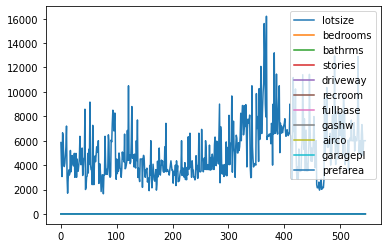

In [ ]:
data[independent].plot()

In [ ]:
X = data[independent] # Consider X as representative of Independent variables
Xnorm = (X - X.min())/(X.max() - X.min())
Xnorm

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.288660,0.4,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.333333,0.0
1,0.161512,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.096907,0.4,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.343643,0.4,0.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.000000,0.0
4,0.323711,0.2,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
541,0.216495,0.4,0.333333,0.000000,1.0,1.0,0.0,0.0,1.0,0.000000,0.0
542,0.298969,0.4,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
543,0.298969,0.4,0.333333,0.000000,1.0,1.0,0.0,0.0,1.0,0.333333,0.0
544,0.298969,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,0.0


In [ ]:
# Plot the normalized data to see all observations in the dataset
Xnorm.corr()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
lotsize,1.000000,0.151851,0.193833,-0.187664,0.288778,0.140327,0.047487,-0.009201,0.221765,0.352872,0.234782
bedrooms,0.151851,1.000000,0.373769,0.339580,-0.011996,0.080492,0.097201,0.046028,0.160412,0.139117,0.078953
bathrms,0.193833,0.373769,1.000000,0.014685,0.041955,0.126892,0.102791,0.067365,0.184955,0.178178,0.064013
stories,-0.187664,0.339580,0.014685,1.000000,-0.054394,-0.019728,0.100340,0.084305,-0.116403,-0.089589,-0.017673
driveway,0.288778,-0.011996,0.041955,-0.054394,1.000000,0.091959,0.043428,-0.011942,0.106290,0.203682,0.199378
recroom,0.140327,0.080492,0.126892,-0.019728,0.091959,1.000000,0.372434,-0.010119,0.136626,0.038122,0.161292
fullbase,0.047487,0.097201,0.102791,0.100340,0.043428,0.372434,1.000000,0.004677,0.045248,0.052524,0.228651
gashw,-0.009201,0.046028,0.067365,0.084305,-0.011942,-0.010119,0.004677,1.000000,-0.130350,0.068144,-0.059170
airco,0.221765,0.160412,0.184955,-0.116403,0.106290,0.136626,0.045248,-0.130350,1.000000,0.156596,0.115626
garagepl,0.352872,0.139117,0.178178,-0.089589,0.203682,0.038122,0.052524,0.068144,0.156596,1.000000,0.092364


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


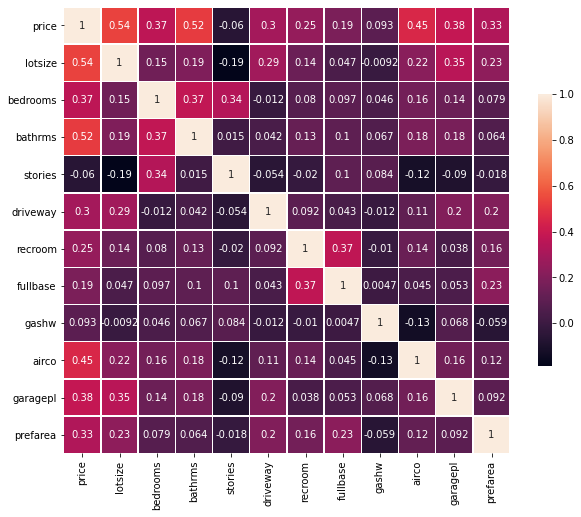

In [ ]:
#Set up the matplotlib figure
import seaborn as sns 

corr = data.corr()
size = max(10, len(corr.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))

#Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax)

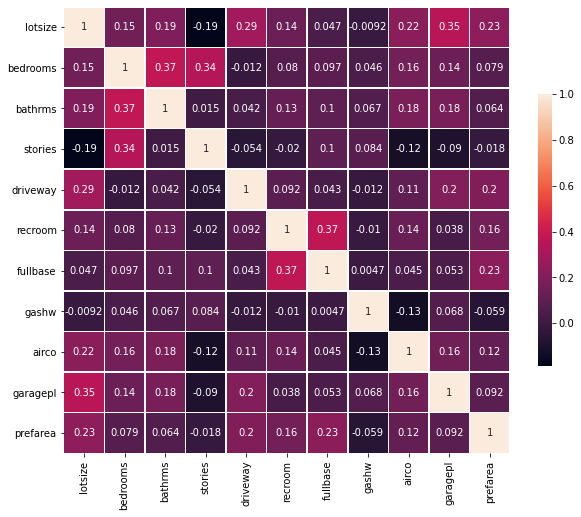

In [ ]:
#Set up the matplotlib figure
import seaborn as sns 

corr = Xnorm.corr()
size = max(10, len(corr.columns)/2.)
f, ax = plt.subplots(figsize=(size, size))

#Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, ax=ax)

In [ ]:
#Normalization using MinMaxScaler library
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.preprocessing import StandardScaler # Standardization

mm = MinMaxScaler()
mm.fit_transform(data)

array([[0.1030303 , 0.28865979, 0.4       , ..., 0.        , 0.33333333,
        0.        ],
       [0.08181818, 0.16151203, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.14848485, 0.09690722, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.47272727, 0.29896907, 0.4       , ..., 1.        , 0.33333333,
        0.        ],
       [0.48484848, 0.29896907, 0.4       , ..., 1.        , 0.33333333,
        0.        ],
       [0.48484848, 0.29896907, 0.4       , ..., 1.        , 0.33333333,
        0.        ]])

In [ ]:
# Standardization = (X - mu) / sigma ----> ((X - Xmean) / Xstd)
Xstd = (X - X.mean()) / X.std()
Xstd

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.322732,0.047192,-0.568973,1.059684,0.404819,-0.464371,1.362070,-0.218853,-0.680410,0.357239,-0.552865
1,-0.530526,-1.308947,-0.568973,-0.815802,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
2,-0.964074,0.047192,-0.568973,-0.815802,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
3,0.691709,0.047192,-0.568973,1.059684,0.404819,2.149509,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
4,0.557955,-1.308947,-0.568973,-0.815802,0.404819,-0.464371,-0.732832,-0.218853,-0.680410,-0.803788,-0.552865
...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161550,0.047192,1.422433,-1.753545,0.404819,2.149509,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
542,0.391915,0.047192,1.422433,-1.753545,0.404819,-0.464371,-0.732832,-0.218853,1.467011,-0.803788,-0.552865
543,0.391915,0.047192,1.422433,-1.753545,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865
544,0.391915,0.047192,1.422433,1.059684,0.404819,2.149509,-0.732832,-0.218853,1.467011,0.357239,-0.552865


In [ ]:
ss = StandardScaler()
Xstd = ss.fit_transform(X)
Xstd

array([[ 0.32302806,  0.0472349 , -0.5694948 , ..., -0.68103375,
         0.35756661, -0.55337157],
       [-0.53101296, -1.31014696, -0.5694948 , ..., -0.68103375,
        -0.80452487, -0.55337157],
       [-0.96495812,  0.0472349 , -0.5694948 , ..., -0.68103375,
        -0.80452487, -0.55337157],
       ...,
       [ 0.39227462,  0.0472349 ,  1.42373699, ...,  1.46835601,
         0.35756661, -0.55337157],
       [ 0.39227462,  0.0472349 ,  1.42373699, ...,  1.46835601,
         0.35756661, -0.55337157],
       [ 0.39227462,  0.0472349 , -0.5694948 , ...,  1.46835601,
         0.35756661, -0.55337157]])

Text(0, 0.5, 'Price (in USD)')

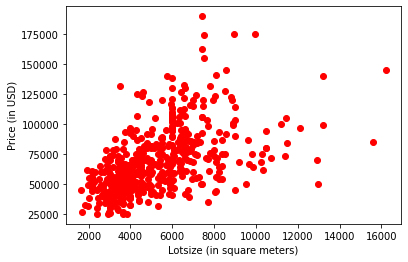

In [ ]:
# Implement the graphs using Dataiku 
import matplotlib.pyplot as plt
plt.scatter(data["lotsize"], data["price"], color="red")
plt.xlabel("Lotsize (in square meters)")
plt.ylabel("Price (in USD)")

Text(0.5, 1.0, 'Comparison of Price with Lotsize')

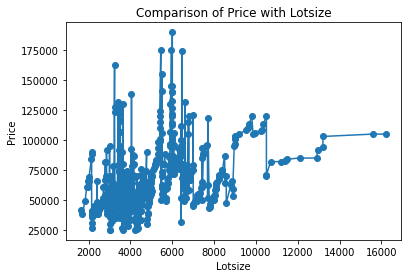

In [ ]:
plt.plot(sorted(data["lotsize"]),data["price"])
plt.scatter(sorted(data["lotsize"]),data["price"])
plt.xlabel("Lotsize")
plt.ylabel("Price")
plt.title("Comparison of Price with Lotsize")

In [ ]:
# Machine Learning 
# Step 1 - Selection of Independent and Dependent variables
Y = data.price # Dependent variable
independent = data.columns
independent = independent.delete(0)
X = data[independent] # Independent variables

In [ ]:
# Since the price is quantitative in nature, use regression equation (Y = mX + c)
import sklearn.linear_model as lm
model = lm.LinearRegression()

# Train the model
model = model.fit(X, Y)

# Objective of training the model with input dataset of dependent and independent variables
# is to calculate the attributes (slope, intercept), which can help in prediction of response
# variable
# Print the slope and intercept
print("The slope(m) of equation is", model.coef_)
print("The intercept/residue (c) is", model.intercept_)

# Predict using the model
Ypred = model.predict(X)

# Interpretation and Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(Y, Ypred)
print("The Rsquared value is", r2)

The slope(m) of equation is [ 3.31458468e+00  4.75489494e+03  1.64296684e+04 -5.00166067e+02
  8.86502893e+03  5.26142983e+03  2.43697123e+03  1.37334959e+04
  1.52367865e+04  3.75996952e+03  9.73890850e+03]
The intercept/residue (c) is -2981.997865242549
The Rsquared value is 0.642699925304296


In [ ]:
data["predicted_price"] = Ypred

In [ ]:
data[["price", "lotsize", "predicted_price"]]

,price,lotsize,predicted_price
0,42000.0,5850,60664.147210
1,38500.0,4000,44580.661992
2,49500.0,3060,46219.847333
3,60500.0,6650,62380.304041
4,61000.0,6360,52403.081847
...,...,...,...
541,91500.0,4800,89415.275438
542,94000.0,6000,88131.347233
543,103000.0,6000,97152.746575
544,105000.0,6000,95652.248373


Text(0.5, 1.0, 'Machine Learning with actual vs predicted')

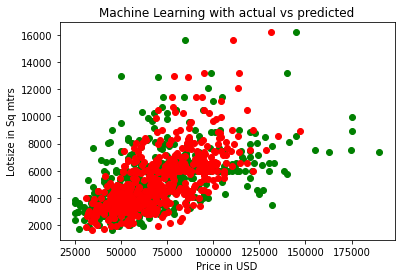

In [ ]:
# Interpretation and Evaluation using Graphs
plt.scatter(data["price"], data["lotsize"], color="green")
plt.scatter(data["predicted_price"], data["lotsize"], color="red")
plt.xlabel("Price in USD")
plt.ylabel("Lotsize in Sq mtrs")
plt.title("Machine Learning with actual vs predicted")

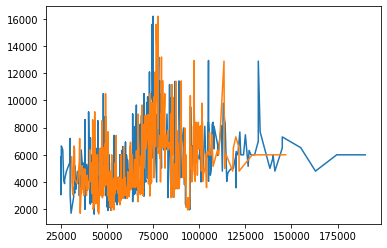

In [ ]:
# Compare the actual vs predicted model
plt.plot(sorted(data["price"]), data["lotsize"])
plt.plot(sorted(data["predicted_price"]), data["lotsize"])

In [ ]:
# make a simple app which can predict price using the model
user_data = {}
for variable in independent:
  temp = input("Enter " + variable + ": ")
  user_data[variable] = temp

user_input = pd.DataFrame(data=user_data, index=[0], columns=independent)
pred_price = model.predict(user_input)
print("Predicted price of the house is USD", int(pred_price[0]))

Enter lotsize: 2500
Enter bedrooms: 2
Enter bathrms: 1
Enter stories: 1
Enter driveway: 0
Enter recroom: 0
Enter fullbase: 0
Enter gashw: 0
Enter airco: 0
Enter garagepl: 0
Enter prefarea: 0
Predicted price of the house is USD 30743
